In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score,f1_score,classification_report
from IPython.display import display
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

## Introduction

#### Subject Matter

The subject of the data is on the ingredients and the eventual quality of a wine. The data has got around 6500 fields and 13 variables which will help in determining how each ingredients quantity eventually influences the quality of the wine. It has several types of chemicals involved along with alcohol and color. 



#### Breakdown of features and its types



### Features

fixed acidity- Continuous variable which represents base level of acidity.

volatile acidity- Continuous variable which represents varying level of acidity.

citric acid- Continuous variable which represents measure of citric acid.

residual sugar- Continuous variable which represents level of sugars.

chlorides- Continuous variable which represents level of chloride.

free sulfur dioxide- Numeric variable which represents free particles in sulfur dioxide.

total sulfur dioxide- Numeric variable which represents total sulfur dioxide.

density- Categorical variable which represents liquid density rating.

pH- Continuous variables which represents pH level.

sulphates- Continuous variables which represents sulphate count.

alcohol- Continuous variables which represents percentage of alcohol.

kind- Categorical variable which represents the kind of wine (Red or White).

quality- Integer variable which represents quality of the wine in the form of ratings/score which ranges between 0 and 10.


 ### Size of data set

In [2]:
wine_read = pd.read_csv('wine3.csv')
del wine_read['sample']
wine_data = wine_read

In [3]:
print("{} rows {} cols".format(len(wine_data),len(wine_data.columns)))

6497 rows 13 cols


## Initial Data Analysis


In [4]:
sum_data = wine_data.isna().sum()
len_data = (len(wine_data))
thisMissingP = round(sum_data/len_data*100,2)
print("low count {} % miss".format(thisMissingP.min()))
print("high count {} % miss".format(thisMissingP.max()))

low count 0.0 % miss
high count 11.02 % miss


In [5]:
thisValues = round(wine_data.isna().sum(),2)
print("Missing Data Count")
print(thisValues)

Missing Data Count
fixed acidity             0
volatile acidity          0
citric acid               0
residual sugar            0
chlorides                 0
free sulfur dioxide     208
total sulfur dioxide      0
density                 716
pH                       78
sulphates                 0
alcohol                 693
quality                   0
kind                     85
dtype: int64


#### Miss Data

After looking at the missing values in the data, I found 5 variables out 13 to be having missing values which are free sulfur dioxide, density, pH, alcohol, and kind. I will have to handle this kind of data.

I will drop the rows from the variables pH and kind.

For the columns free sulfur dioxide, density, and alcohol. I will use the frontfill approach.

In [6]:
wine_data = wine_data.dropna(subset=['pH', 'kind'])
wine_data = wine_data.fillna(method='ffill')

#### Formatting data

As we can see in the variable density which is a categorical variable. There are spelling mistakes in the data which can have an influence in the analysis. To fix this issue, I plan to reformat this data again into 4 categories which are low, medium, high, and very high.


In [7]:
wine_data.loc[wine_data.density == "hig", 'density'] = "High"
wine_data.loc[wine_data.density == "very hig", 'density'] = "Very High"
wine_data.loc[wine_data.density == "mediu", 'density'] = "Medium"
wine_data.loc[wine_data.density == "lo", 'density'] = "Low"

#### Outliers

2 of the 13 variables are categorical data, Kind and density on which outliers don’t apply. Quality is a variable which falls under a range which is between 0-10 so there cannot be any outliers in this column.

For the rest of the 10 variables, I am creating a function which will remove those outliers

In [8]:
def Remove_outlier(data,column):
    cq1 = column.quantile(.25)
    cq3 = column.quantile(.75)
    
    iqr = cq3 - cq1
    
    lower_bound = cq1 -(1.5 * iqr)
    upper_bound = cq3 +(1.5 * iqr)
    
    data = data[(column > lower_bound) & (column < upper_bound)]   
    return data

In [9]:
wine_data_copy = Remove_outlier(wine_data,wine_data['fixed acidity'])
wine_data_copy = Remove_outlier(wine_data,wine_data['volatile acidity'])
wine_data_copy = Remove_outlier(wine_data,wine_data['citric acid'])
wine_data_copy = Remove_outlier(wine_data,wine_data['residual sugar'])
wine_data_copy = Remove_outlier(wine_data,wine_data['chlorides'])
wine_data_copy = Remove_outlier(wine_data,wine_data['free sulfur dioxide'])
wine_data_copy = Remove_outlier(wine_data,wine_data['total sulfur dioxide'])
wine_data_copy = Remove_outlier(wine_data,wine_data['pH'])
wine_data_copy = Remove_outlier(wine_data,wine_data['sulphates'])
wine_data_copy = Remove_outlier(wine_data,wine_data['alcohol'])

In [10]:
wine_data = wine_data_copy

In [11]:
wine_data.to_csv('wine_data.csv')

## Exploratory Data Analysis


#### Feature Correlation

In [12]:
wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.220692,0.286521,-0.110857,0.296405,-0.243235,-0.329112,-0.252988,0.296821,-0.090906,-0.076074
volatile acidity,0.220692,1.000000,-0.413050,-0.195228,0.375674,-0.413468,-0.412695,0.260458,0.224865,-0.042836,-0.264924
citric acid,0.286521,-0.413050,1.000000,0.110597,-0.022652,0.343971,0.148520,-0.288476,0.067253,0.130255,0.394158
residual sugar,-0.110857,-0.195228,0.110597,1.000000,-0.127790,0.247953,0.493756,-0.268125,-0.182409,-0.325273,-0.035075
chlorides,0.296405,0.375674,-0.022652,-0.127790,1.000000,-0.266197,-0.278579,0.041840,0.394765,-0.237113,-0.200720
free sulfur dioxide,-0.243235,-0.413468,0.343971,0.247953,-0.266197,1.000000,0.460693,-0.086010,-0.102645,0.175590,0.693733
total sulfur dioxide,-0.329112,-0.412695,0.148520,0.493756,-0.278579,0.460693,1.000000,-0.237185,-0.273604,-0.243486,-0.041485
pH,-0.252988,0.260458,-0.288476,-0.268125,0.041840,-0.086010,-0.237185,1.000000,0.190570,0.096817,0.020689
sulphates,0.296821,0.224865,0.067253,-0.182409,0.394765,-0.102645,-0.273604,0.190570,1.000000,-0.014820,0.040054
alcohol,-0.090906,-0.042836,0.130255,-0.325273,-0.237113,0.175590,-0.243486,0.096817,-0.014820,1.000000,0.413862


### Feature Analysis

#### Fixed Acidity

Avg fixed acidity 7.2%
Max fixed acidity 3.8
Min fixed acidity15.6


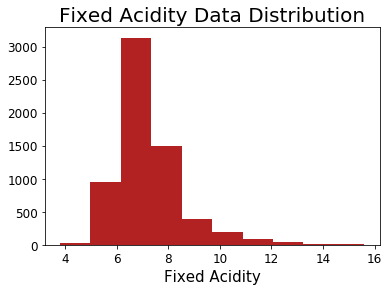

In [13]:
print("Avg fixed acidity {}%".format(round(wine_data['fixed acidity'].mean(),1)))
print("Max fixed acidity {}".format(round(wine_data['fixed acidity'].min(),1)))
print("Min fixed acidity{}".format(round(wine_data['fixed acidity'].max(),1)))

plt.hist(wine_data['fixed acidity'],color='firebrick')
plt.xlabel('Fixed Acidity',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Fixed Acidity Data Distribution",fontsize=20)
plt.show()

#### Volatile Acidity

Avg volatile acidity  0.3%
Max volatile acidity 0.1
Min volatile acidity  1.6


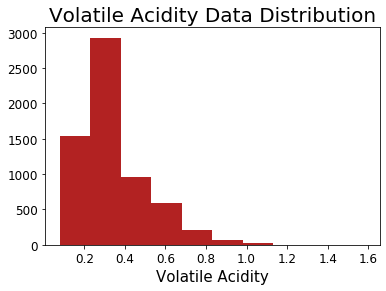

In [14]:
print("Avg volatile acidity  {}%".format(round(wine_data['volatile acidity'].median(),1)))
print("Max volatile acidity {}".format(round(wine_data['volatile acidity'].min(),1)))
print("Min volatile acidity  {}".format(round(wine_data['volatile acidity'].max(),1)))

plt.hist(wine_data['volatile acidity'],color='firebrick')
plt.xlabel('Volatile Acidity',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Volatile Acidity Data Distribution",fontsize=20)
plt.show()

#### Citric Acid

Avg Citric Acid 1.9 %
Max Citric Acid 0.0
Min Citric Acid 10.0


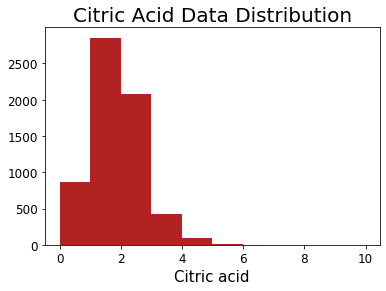

In [15]:
print("Avg Citric Acid {} %".format(round(wine_data['citric acid'].median(),1)))
print("Max Citric Acid {}".format(round(wine_data['citric acid'].min(),1)))
print("Min Citric Acid {}".format(round(wine_data['citric acid'].max(),1)))

plt.hist(wine_data['citric acid'],color='firebrick')
plt.xlabel('Citric acid',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Citric Acid Data Distribution",fontsize=20)
plt.show()

#### Residual Sugars

Avg Residual Sugar 3.0 %
Max Residual Sugar 0.6
Min Residual Sugar 65.8


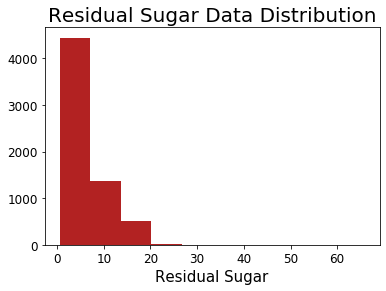

In [16]:
print("Avg Residual Sugar {} %".format(round(wine_data['residual sugar'].median(),1)))
print("Max Residual Sugar {}".format(round(wine_data['residual sugar'].min(),1)))
print("Min Residual Sugar {}".format(round(wine_data['residual sugar'].max(),1)))

plt.hist(wine_data['residual sugar'],color='firebrick')
plt.xlabel('Residual Sugar',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Residual Sugar Data Distribution",fontsize=20)
plt.show()

#### Free Sulpher Dioxide and Quality 

         free sulfur dioxide
quality                     
3                 102.350000
4                 102.078199
5                 130.646283
6                 151.233514
7                 170.140000
8                 191.560209
9                 212.200000


Text(0.5, 1.0, 'Linearity between Free Sulpher Dioxide and Quality')

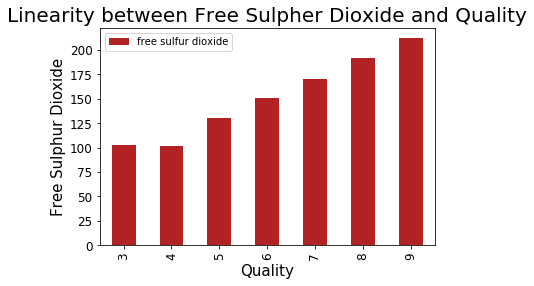

In [17]:
table = pd.pivot_table(wine_data,index=['quality'],values=['free sulfur dioxide'])
print(table)

table.plot(kind='bar',title='Linearity between Free Sulpher Dioxide and Quality',fontsize=20,color='firebrick')
plt.xlabel('Quality',fontsize=15)
plt.ylabel('Free Sulphur Dioxide',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Linearity between Free Sulpher Dioxide and Quality",fontsize=20)

#### Density

Text(0.5, 1.0, 'Density Distribution')

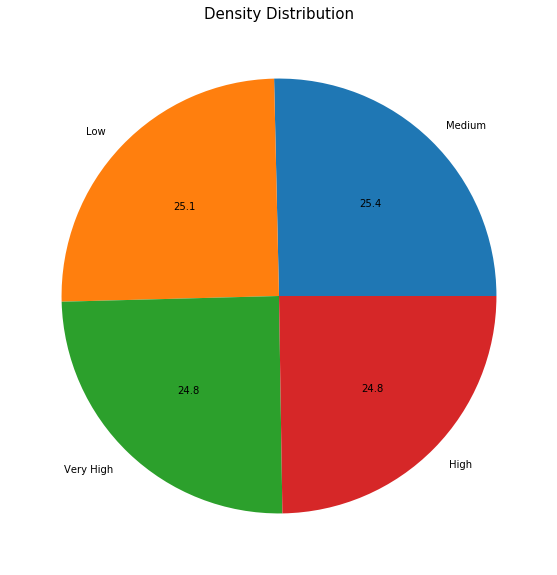

In [18]:
total = sum(wine_data['density'].value_counts())

index = []
counts = []
for i,j in zip(wine_data['density'].value_counts(),wine_data['density'].value_counts().index):
    index.append(j)
    counts.append(round((i/total)*100,2))

xx = counts
fg, ax = plt.subplots(figsize=(10,10))
ax.pie(xx, labels=index, autopct="%1.1f")
ax.set_title("Density Distribution",fontsize=15)

#### Kind of Wine

In [19]:
print("Following is the kind of wine distribution:")
print(wine_data.kind.value_counts())

Following is the kind of wine distribution:
white    4780
red      1552
Name: kind, dtype: int64


Avg pH is 3.2 %
Max pH 2.7
Min pH 4.0


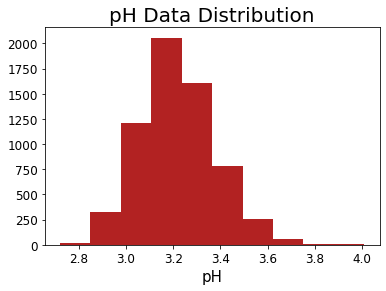

In [20]:
print("Avg pH is {} %".format(round(wine_data['pH'].mean(),1)))
print("Max pH {}".format(round(wine_data['pH'].min(),1)))
print("Min pH {}".format(round(wine_data['pH'].max(),1)))

plt.hist(wine_data['pH'],color='firebrick')
plt.xlabel('pH',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("pH Data Distribution",fontsize=20)
plt.show()

#### Chloride

Avg of chloride 0.0%
Max of chloride 0.0
Min of chloride 0.6


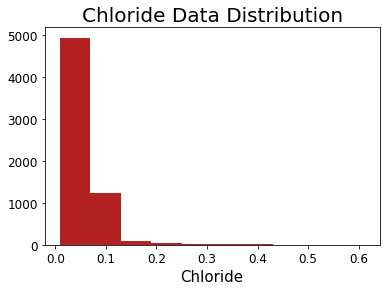

In [21]:
print("Avg of chloride {}%".format(round(wine_data['chlorides'].median(),1)))
print("Max of chloride {}".format(round(wine_data['chlorides'].min(),1)))
print("Min of chloride {}".format(round(wine_data['chlorides'].max(),1)))

plt.hist(wine_data['chlorides'],color='firebrick')
plt.xlabel('Chloride',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Chloride Data Distribution",fontsize=20)
plt.show()

#### Total Sulfur Dioxide

Avg Sulfur Dioxide 118.0
Max Sulfur Dioxide 6.0
Min Sulfur Dioxide 440.0


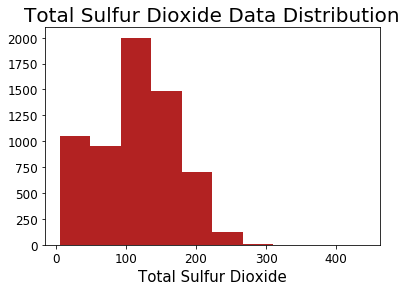

In [22]:
print("Avg Sulfur Dioxide {}".format(round(wine_data['total sulfur dioxide'].median(),1)))
print("Max Sulfur Dioxide {}".format(round(wine_data['total sulfur dioxide'].min(),1)))
print("Min Sulfur Dioxide {}".format(round(wine_data['total sulfur dioxide'].max(),1)))

plt.hist(wine_data['total sulfur dioxide'],color='firebrick')
plt.xlabel('Total Sulfur Dioxide',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Total Sulfur Dioxide Data Distribution",fontsize=20)
plt.show()

#### Sulphates

Avg sulphates 0.5
Max sulphates 0.2
Min sulphates 2.0


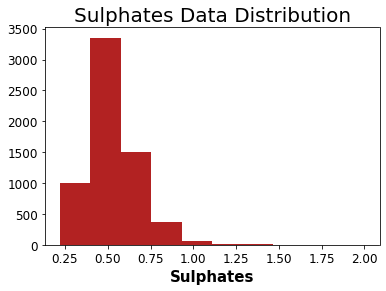

In [23]:
print("Avg sulphates {}".format(round(wine_data['sulphates'].median(),1)))
print("Max sulphates {}".format(round(wine_data['sulphates'].min(),1)))
print("Min sulphates {}".format(round(wine_data['sulphates'].max(),1)))

plt.hist(wine_data['sulphates'],color='firebrick')
plt.xlabel('Sulphates', fontweight='bold',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Sulphates Data Distribution",fontsize=20)
plt.show()

## Classification Model


#### Gaussian Naive Bayes Classifier


In [24]:
gaussian = GaussianNB()

In [25]:
#free sulfur dioxide, total sulfur dioxide
fFet, fPre, sFet, sPre = train_test_split(wine_data.iloc[:,[5,10]],wine_data.iloc[:,-2], test_size=0.3, random_state=6)

In [26]:
dependent = gaussian.fit(fFet, sFet).predict(fPre)

In [27]:
Class_report = classification_report(sPre, dependent,output_dict=True)
print("Classification Report:")
print(classification_report(sPre, dependent))

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.71      0.26      0.38        57
           5       0.70      0.69      0.70       640
           6       0.62      0.75      0.68       819
           7       0.58      0.42      0.48       318
           8       0.37      0.18      0.24        56
           9       0.00      0.00      0.00         2

    accuracy                           0.64      1900
   macro avg       0.43      0.33      0.35      1900
weighted avg       0.63      0.64      0.63      1900



/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


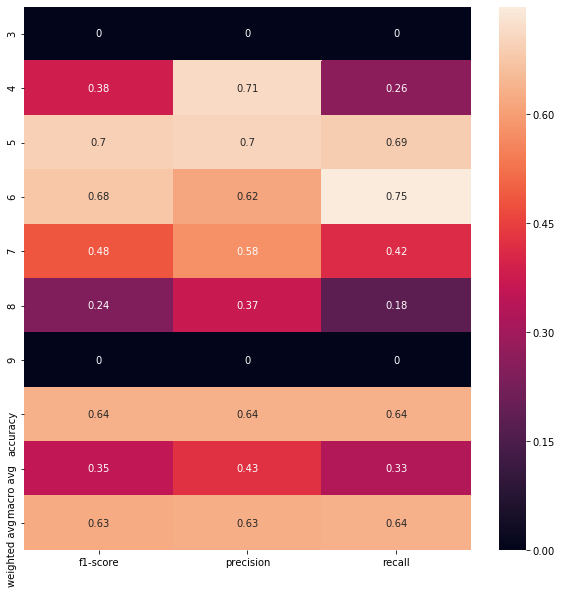

In [28]:
fg, ax = plt.subplots(figsize=(10,10))        
sns.heatmap(pd.DataFrame(Class_report).iloc[:-1, :].T, annot=True,ax=ax)

#### Decision Tree (Part One)

In [29]:
wine_read = wine_read.dropna()

In [30]:
wine_read["kind"] = wine_read["kind"].astype('category')
wine_read["kind_encoded"] = wine_read["kind"].cat.codes

In [31]:
wine_read["density"] = wine_read["density"].astype('category')
wine_read["density_encoded"] = wine_read["density"].cat.codes

In [32]:
X = wine_read.iloc[:,[0,1,2,5,6,8,9,10,13,14]]
y = wine_read.quality

In [33]:
fFet, fPre, sFet, sPre = train_test_split(X, y, test_size=0.5, random_state=60)

In [34]:
decision_tree = DecisionTreeClassifier(max_depth=3, random_state=1)

In [35]:
decision_tree.fit(fFet, sFet)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [36]:
Class_report = classification_report(sFet, decision_tree.predict(fFet),output_dict=True)
print(classification_report(sFet, decision_tree.predict(fFet)))

              precision    recall  f1-score   support

           3       1.00      0.62      0.76        13
           4       0.86      0.70      0.78        71
           5       0.76      0.79      0.77       837
           6       0.70      0.70      0.70      1036
           7       0.59      0.67      0.62       408
           8       0.00      0.00      0.00        77
           9       0.00      0.00      0.00         2

    accuracy                           0.70      2444
   macro avg       0.56      0.50      0.52      2444
weighted avg       0.68      0.70      0.69      2444



/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


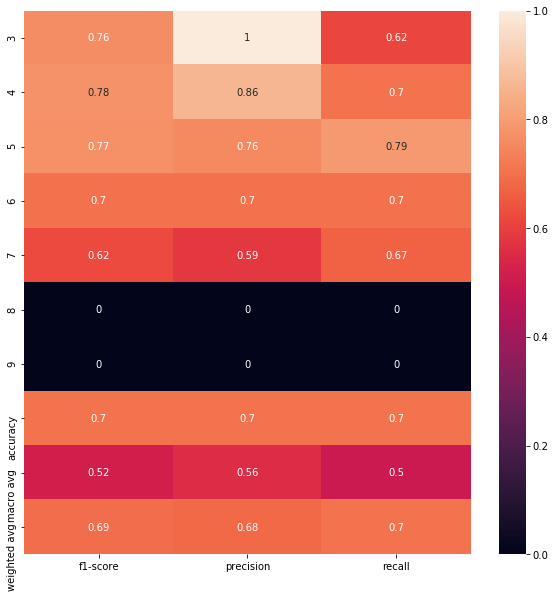

In [37]:
fg, ax = plt.subplots(figsize=(10,10))        
sns.heatmap(pd.DataFrame(Class_report).iloc[:-1, :].T, annot=True,ax=ax)

#### Decision Tree (Part Two)

In [38]:
wine_data["kind"] = wine_data["kind"].astype('category')
wine_data["kind_encoded"] = wine_data["kind"].cat.codes

In [39]:
wine_data["density"] = wine_data["density"].astype('category')
wine_data["density_encoded"] = wine_data["density"].cat.codes

In [40]:
X = wine_data.iloc[:,[0,2,3,5,6,10,13,14]]
y = wine_data.quality

In [41]:
fFet, fPre, sFet, sPre = train_test_split(X, y, test_size=0.3, random_state=168)

In [42]:
decision_tree = DecisionTreeClassifier(max_depth=5, random_state=8)

In [43]:
decision_tree.fit(fFet, sFet)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=8, splitter='best')

In [44]:
Class_report = classification_report(sFet, decision_tree.predict(fFet),output_dict=True)
print(classification_report(sFet, decision_tree.predict(fFet)))

              precision    recall  f1-score   support

           3       1.00      0.62      0.76        21
           4       0.87      0.73      0.80       141
           5       0.81      0.77      0.79      1467
           6       0.73      0.82      0.77      1916
           7       0.72      0.65      0.68       759
           8       0.57      0.35      0.43       123
           9       0.00      0.00      0.00         5

    accuracy                           0.76      4432
   macro avg       0.67      0.56      0.61      4432
weighted avg       0.76      0.76      0.75      4432



/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


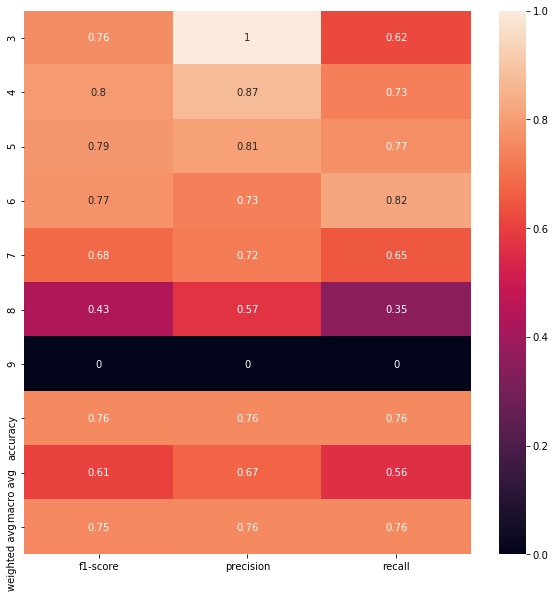

In [45]:
fg, ax = plt.subplots(figsize=(10,10))        
sns.heatmap(pd.DataFrame(Class_report).iloc[:-1, :].T, annot=True,ax=ax)

In the first model, all NA values were dropped, and all the variables were used to predict the dependent variable quality.

In the second model, I put less feature to generate a higher accuracy.

## Summary


There were 2 types of blank data I needed to handle.

Spelling mistakes.

Free sulfur dioxide is the one that most affects the quality of the wine.
